# Numerical Methods 07-1: Romberg Ahead!

## Gabriel M Steward

### March 2023

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

[Problem 1](#P1) (The Only One)

<a id='P1'></a>

# Problem 1 \[Back to [top](#toc)\]
$$\label{P1}$$

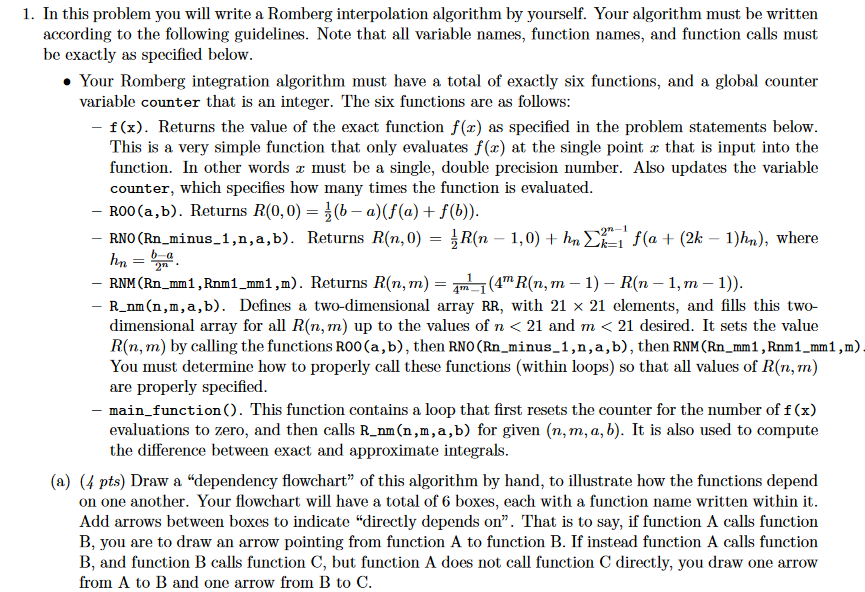

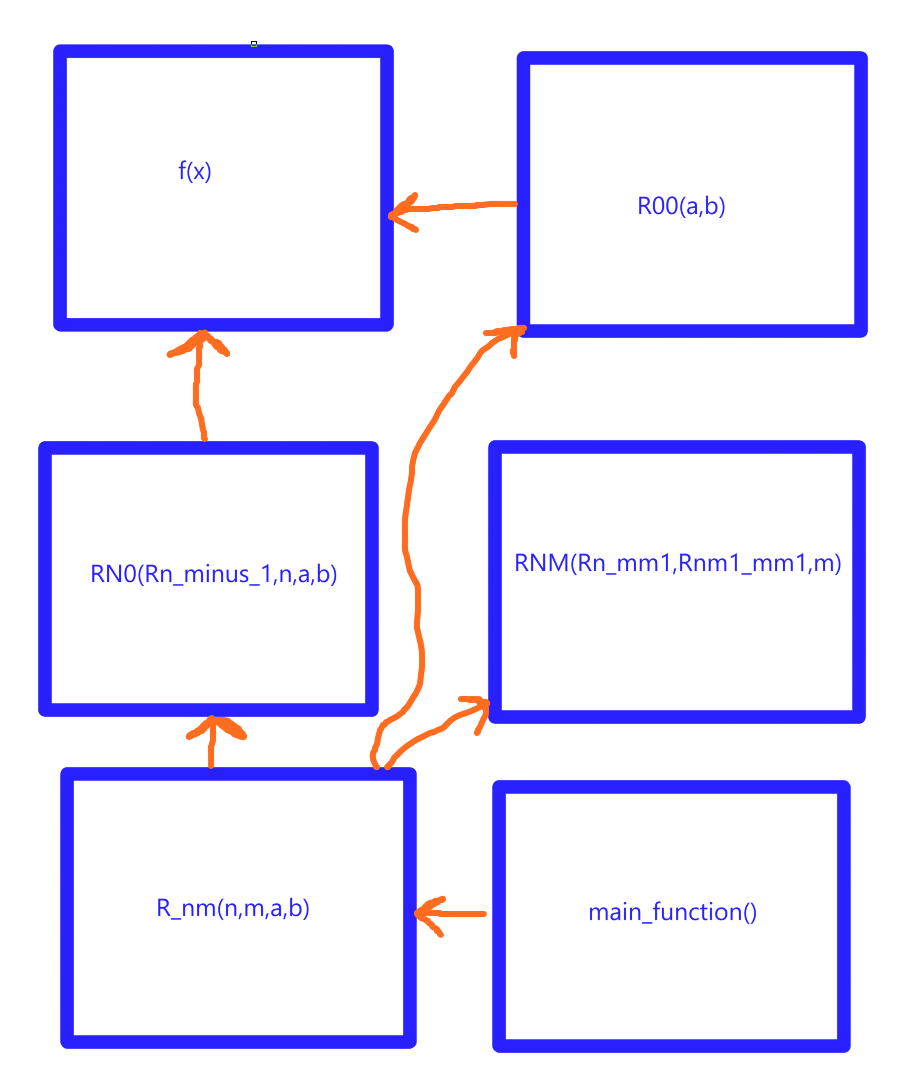

As we can see here, main_function is the highest level funmction, which calls R_nm. R_nm calls R00, RN0, and RNM. Of these, both R00 and RN0 call f(x), but notably RNM doesd not! Yes, RNM depends on values from R00 and RN0, but they are passed to it as argumetns and are not actually part of RNM itself. 

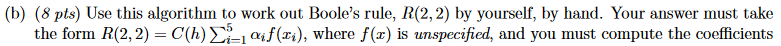

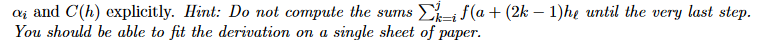

Curiously, we are not coding anything yet, we have to work something out by hand. We need to find R(2,2). a and b are not specified, so we shall leave them as general. In terms of the code, our fist evaluation would be $R_{22}(2,2,a,b)$. 

We call R00 first. This takes in the unspecified a and b, which means we have to keep it in function form $\frac12 (b-a) (f(a)+f(b))$. 

Then we call RN0, inserting the value of R00 into it so we can find R10. 

$$ R(1,0) = \frac14 (b-a) (f(a)+f(b)) + h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) $$

And we can use this again to find R(2,0). 

$$ R(2,0) = \frac12 \left( \frac14 (b-a) (f(a)+f(b)) + h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) \right) + h_2 \sum_{k=1}^{2} f(a+(2k-1)h_2) $$

Now our ultimate goal is to find R(2,2). This would be found by calling RNM. Inside, we can see that R(2,2) depends on R(2,1) and R(1,1). We don't have either of these, so we must find what they depend on.

R(2,1) depends on R(2,0) and R(1,0). R(1,1) depends on R(1,0) and R(0,0). We have all of these, so we can construct them piece by piece. 

$$ R(1,1) = \frac{1}{3} \left(4 \left[ \frac14 (b-a) (f(a)+f(b)) + h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) \right] - \left[ \frac12 (b-a) (f(a)+f(b)) \right] \right) $$
$$ R(2,1) = \frac{1}{3} \left(4 \left[ \frac12 \left( \frac14 (b-a) (f(a)+f(b)) + h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) \right) + h_2 \sum_{k=1}^{2} f(a+(2k-1)h_2)\right] \\ - \left[ \frac14 (b-a) (f(a)+f(b)) + h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) \right] \right) $$ 

And so at last we go to

$$ R(2,2) = \frac{1}{15} (16 R(2,1) - R(1,1)) $$

So *all at once*, this is...


$$ \Rightarrow R(2,2) = \frac{1}{15} \left[ \\
16 \left( \frac{1}{3} \left(4 \left[ \frac12 \left( \frac14 (b-a) (f(a)+f(b)) + h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) \right) + h_2 \sum_{k=1}^{2} f(a+(2k-1)h_2)\right] \\ - \left[ \frac14 (b-a) (f(a)+f(b)) + h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) \right] \right) \right) \\
- \left( \frac{1}{3} \left(4 \left[ \frac14 (b-a) (f(a)+f(b)) + h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) \right] - \left[ \frac12 (b-a) (f(a)+f(b)) \right] \right) \right) \right] $$

Were there ways to simplify this before this point? Probably, but we were told not to evaluate the sums so we got paranoid. Anyway, it does look like a lot of things are going to combine and/or cancel. So step one is to multiply our constants through.

$$ \Rightarrow R(2,2) = \frac{1}{15} \left[ \frac83 (b-a) (f(a)+f(b)) + \frac{32}{3}  h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) + \frac{64}{3}  h_2 \sum_{k=1}^{2} f(a+(2k-1)h_2)\\
-  \frac{4}{3} (b-a) (f(a)+f(b)) - \frac{16}{3} h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1)\\
- \frac{1}{3} (b-a) (f(a)+f(b)) - \frac{4}{3} h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) + \frac16 (b-a) (f(a)+f(b))\right] \\ $$

We have some clear like terms. Simplify them.

$$ \Rightarrow R(2,2) = \frac{1}{15} \left[ \frac{7}{6} (b-a) (f(a)+f(b)) + 4 h_1 \sum_{k=1}^{1} f(a+(2k-1)h_1) + \frac{64}{3}  h_2 \sum_{k=1}^{2} f(a+(2k-1)h_2)\right] \\ $$

This will result in five different ways to evaluate f, which is the form we were told to expect at the start of the problem. We can still pull out terms that are in every single term, though. To do that, we will expand the h values by $h_n = \frac{b-a}{2^n}$

$$ \Rightarrow R(2,2) = \frac{1}{15} \left[ \frac{7}{6} (b-a) (f(a)+f(b)) + 2 (b-a) \sum_{k=1}^{1} f(a+(2k-1)(b-a)\frac12) + \frac{16}{3} (b-a) \sum_{k=1}^{2} f(a+(2k-1)(b-a)\frac14)\right] \\ $$
$$ \Rightarrow R(2,2) = \frac{(b-a)}{90} \left[ 7 (f(a)+f(b)) + 12 \sum_{k=1}^{1} f(a+(2k-1)(b-a)\frac12) + 32 \sum_{k=1}^{2} f(a+(2k-1)(b-a)\frac14)\right] \\ $$

Now we can arrange everything by the sort of function it is--evaluate the sums and find out what the argumetns of f are. 

$$ \Rightarrow R(2,2) = \frac{(b-a)}{90} \left[ 7 f(a) + 32 f(a+\frac{b-a}{4}) + 12 f(a+\frac{b-a}{2})  + 32 f(a+\frac{3(b-a)}{4})  + 7 f(b) \right] $$

Which is in the form we were asked for, with exactly five terms. 

However this is not exactly the same as the Boole's rule we look up when we search online. We have 1/90. Their coefficient is 2/45, precisely 4 times larger. 

We initially assumed this was because *we* were wrong, however, in trying to track down the error we decided to perform a test, a very simple test: use this rule to integrate $e^x$ from 0 to 1. Thus a=0, b=1, simplifying things a lot.

$$ R(2,2) = \frac{1}{90} \left[ 7 e^0 + 32 e^{1/4} + 12 e^{1/2}  + 32 e^{3/4} + 7 e^{1} \right] $$

Now, the term in square brackets evaluates to 154.6454419 according to our calculator. If we divide this by 90, we get 1.718282688. The actual value for the integral is 1.718281828. This is *very* close. 

However, if we were to go with what the online resources suggest, 2/45, we would simply get the wrong answer. We are unsure what is going on here, as all the online resources seem to say the same thing. Is there some scaling factor we should be dealing with based on the size of the step itself? Regardless, we will go forward assuming our answer is the proper one, rather than the online one, as it is what gives us the right estimation for the integral.

(Incidentially the code indicates the answer is 1.71828268792476e+00 which is also what we get from out calculation just with more digits.) 

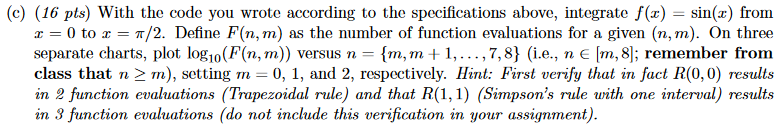

We wrote the code before this as part of checking part b), but this is the first time we use it so we'll talk about it a bit. Most of it is exactly as described in the problem statement, nothing surprising. (We also did the requested verifications but do not reproduce them here).

However, we do wish to note that we do not like the presence of the global counter variable. Friends don't let friends use mutable global variables in their code. But we didn't want to change the function definitions to allow extra variables to be passed through them, as that might break the problem's requirements, so mutable global variable it is. 

Since main_function() has no argumetns, we annoyingly decided that we couldn't actually pass it any variables, which would normally be a necessity for running the code multiple times in one run and creating a table. Again, we would have added arguments, but the instructions clealry show no arguments in main_function(). So we instead made n and m global mutable variables as well so our code could run multiple instances. (a and b are constant and are thus perfectly fine.) 

We also assumed that we could use the built-in functions, because otherwise we would have had to define a power function and we were explicitly told *exactly six functions*. 

Anyway, the code itself can be found in the coding part of this assignment. It was run once for m=0, once for m=1, and once for m=2. 

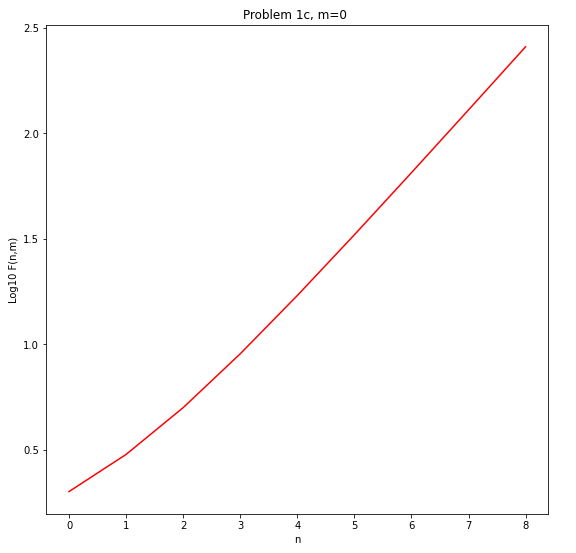

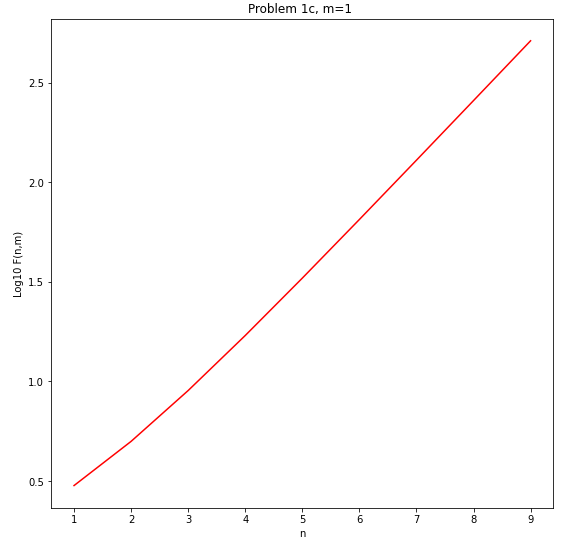

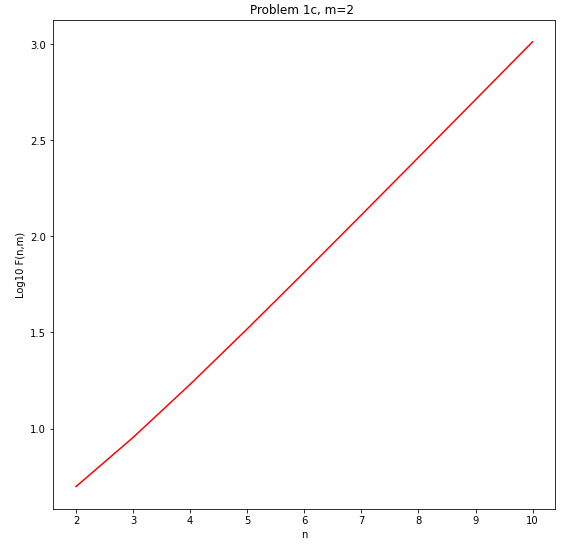

The obvious obesrvation that isn't so evident from the graphs but is from the data itself: the poitns are identical. n=5 produces F=33 every time. 

Furthermore, the line of the log plot is mostly linear. On the log plot. 

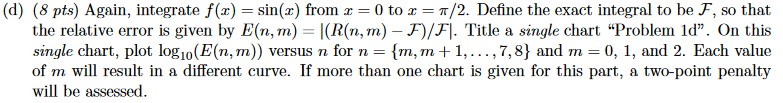

The integral of sinx from 0 to $\pi/2$ is a well known result, it's 1. (More well known is 0 to $\pi$, which is 2, but due to symmetry this one must be 1). 

Thus $\mathcal F = 1$, which simplifies E considerably to just the absolute value of R-1. 

Fortunately the iterations are still the same as previously, we're just reporting another value.

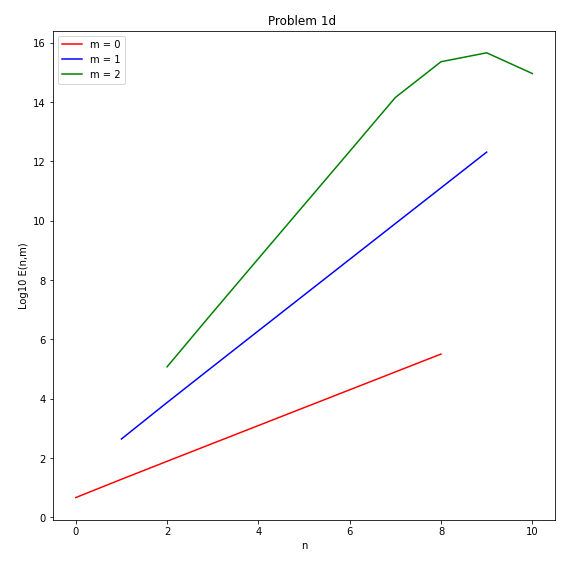

This produces lines, with the exception of m=2, but m=2 is hitting roundoff error so we can't really trust that hook at the end anyway. in ideal situations it probably is just a line. 

Conclusions: higher numbers are more accurate, increasing m increases accuracy faster than increasing n. 

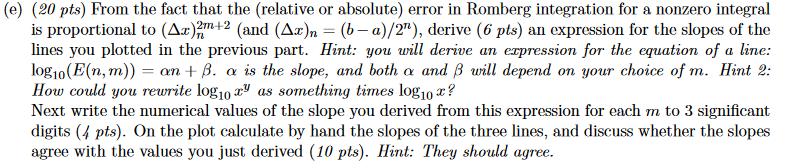

So, let's expand some expressions out so they're easier to actually see.

$$ (\Delta x)_n^{2m+2} = \left(\frac{b-a}{2^n}\right)^{2m+2} $$

Now our error is E. E is *propotional* to the above, so the relation will involve a constant.

$$ E(n,m) = C \left(\frac{b-a}{2^n}\right)^{2m+2} $$

Where C is some arbitrary constant. We will be making use of this a lot. Anyway, so we want to find the slope of the log of this mysterious thing.

$$ log_{10}E(n,m) = log_{10}\left[C \left(\frac{b-a}{2^n}\right)^{2m+2}\right] $$

Now we know the logarithm rule $log(x^a) = alog(x)$ Since C is a constant we can just say it's something to the same power as the rest of the logarithm and get...

$$  = (2m+2)log_{10}\left[C \left(\frac{b-a}{2^n}\right)\right] $$

Logarithms can also be split up. Divisions result in a subtraciton.

$$  = (2m+2)(log_{10}(C(b-a))-log_{10}(2^n)) $$

the logarithm of C(b-a) is just some constant, so we can combine it all into C as C is really arbitrary at this point. It's also irrelevant to n, which is what we need our slops in terms of. We can pull that n out...

$$  = (2m+2)(log_{10}(C)-nlog_{10}(2)) $$
$$  = (2m+2)log_{10}(C)-n(2m+2)log_{10}(2) $$

This is in the form y=mx+b, which identifies the slope as...

$$-(2m+2)log_{10}(2)$$

Though notably since we took the absolute value this will actually be positive.

$$(2m+2)log_{10}(2)$$

Now if we actually evaluated this out with a calculator it would be approximately

$$ (m+1)0.602 $$

As a test, let m=0. The slope is then 0.602. This times 8 is 4.816, or about 5, which is what we see on the graph for the m=0 line at n=8. Check complete! 

Fun bonus: if we wanted to write this another way, we could pull the 2 into the logarithm and get

$$ (m+1)log_{10}(4) $$

This does look quite a bit neater. Again, conclusions: increasing m increases the slope, meaning less error. 

Now for a more in-depth analysis rather than just a quick check to see if the result makes sense. (And this is what the problem actually asks for). 

m=0 has slope 0.602
m=1 has slope 1.20
m=2 has slope 1.81

Now, eyeballing the slopes on the graphs is somewaht difficult, but we will make our attempt. 

Roughly, m=0 line appears to rise 5 and run 8, and 5/8 = 0.625, which is close to 0.602.
Roughly, m=1 line appears to rise 9 and run 8, and 9/8 = 1.125, which is close to 1.20.
m=2 is somewhat difficult since we have the hook, so we ignore the hook and calculate the slope directly from the straight part. This section has a rise of 9 and a run of 5, and 9/5 = 1.8. Which is very *very* close to 1.81. Fortunate! 

Anyway yes they match. m=2 was far closer than we expected from eyeballing the slope on a graph. 

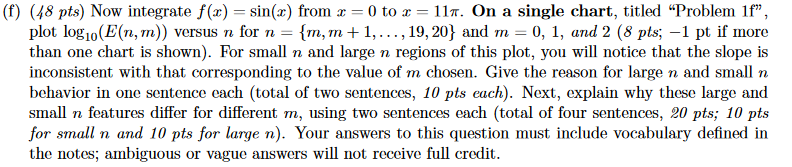

The creation of this graph required only minor adjustments of the code. The most surprising adustment was to the size of RR, we were told to declare it of size 21. This won't hold all the calculations for m=2, which goes to n=m+20=22. But a simple increase in size was enough to handle this. 

Anyway, the graph itself is...

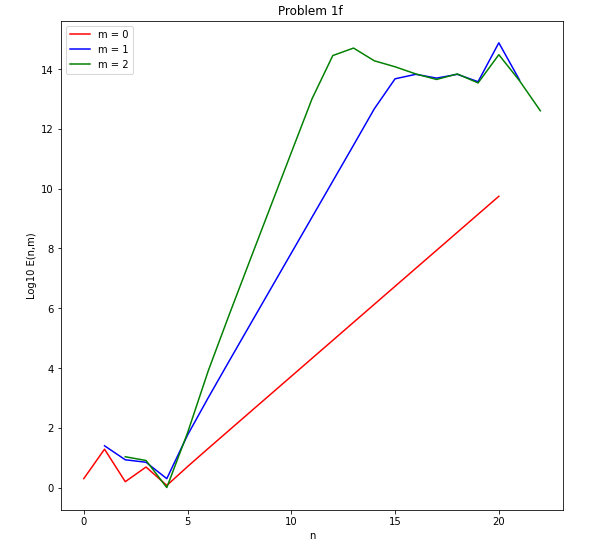

As for the questions we were asked to answer, we already discussed the large-n problem--the code starts to approach machine roundoff error at 15 digits of precision, so we can't get any more precise and everything starts to fluctuate randomly as is signature with roundoff error. As for the low-n errors, this is due to *undersampling error*, as sin(x) is an oscillating function if we don't sample it enough we will not get a good picture of how it behaves. 

As for why these behaviors are different for different values of m, that requires a bit more explanation. The large features are a bit more sensible: the larger orders of m hit the point of machine prevision faster, and thus devolve into the roundoff errors at lower values of n. In the graph above, m=0 doesn't even go far enough to hit it. As for the lower-n side of things, the only real noticalbe difference is that fluctuations for lowewr m-orders are larger than the higher m-orders, but this feasibly could just be randomness. If it isn't randomness, then we cite the fact that increasing m always makes the overall calculation smoother, as higher m-values take lover m-values and fuse them together with mathematics--although this does not appear to do anything but smooth out the data, as all values of m start entering their linear regime at n=4. 